In [ ]:
import tensorflow as tf

#introduction to regression with neural netwrok in tensorflow


Creating data to view and fit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

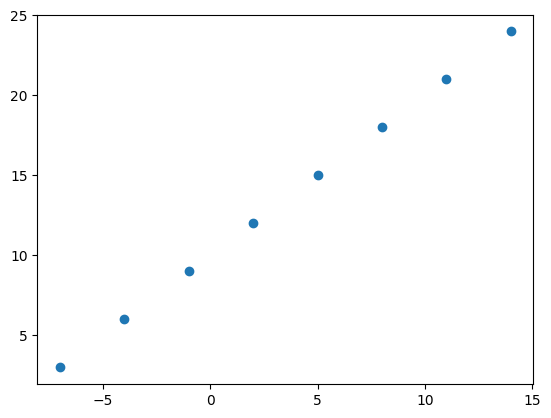

In [ ]:
#create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize it
plt.scatter(X, y);

In [ ]:
y == X +10

array([ True,  True,  True,  True,  True,  True,  True,  True])

Input and output shapes

In [ ]:
#create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([93700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([93700], dtype=int32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X = tf.cast(tf.constant(X), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Modelling

In [ ]:
#set a random seed
tf.random.set_seed(42)

#1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# same as (alternate way to create a model) #

#model = tf.keras.Sequential()
#model.add(tf.keras.layers.Dense(1))

#2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,  #mae stands for mean absolute error
    optimizer = tf.keras.optimizers.SGD(), #sgd is short for stochastic gradient descent
    metrics = ["mae"]
)

#3. Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 1s 506ms/step - loss: 12.2842 - mae: 12.2842
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 12.1517 - mae: 12.1517
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 12.0192 - mae: 12.0192
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 11.8867 - mae: 11.8867
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 11.7542 - mae: 11.7542


In [ ]:
#try and make a prediction 
model.predict([17.0])

1/1 [==============================] - 0s 98ms/step


array([[8.930218]], dtype=float32)

In [ ]:
#Lets rebuild our model to improve it
# 1. Create our model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ["mae"])

#3.Fit the model
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 14.8007 - mae: 14.8007
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 14.7300 - mae: 14.7300
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 14.6593 - mae: 14.6593
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 14.5887 - mae: 14.5887
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 14.5183 - mae: 14.5183
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 14.4479 - mae: 14.4479
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 14.3776 - mae: 14.3776
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 14.3074 - mae: 14.3074
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 14.2374 - mae: 14.2374
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 14.1673 - mae: 14.1673
Epoch 11/100
1/1 [==============================] - 0s

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 57ms/step


array([[26.095898]], dtype=float32)

#Evaluating a model


In [ ]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = X +10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

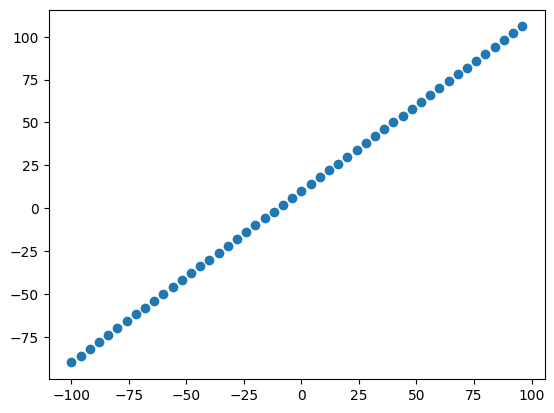

In [ ]:
#visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y )

In [ ]:
len(X)

50

In [ ]:
#Splitting the data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

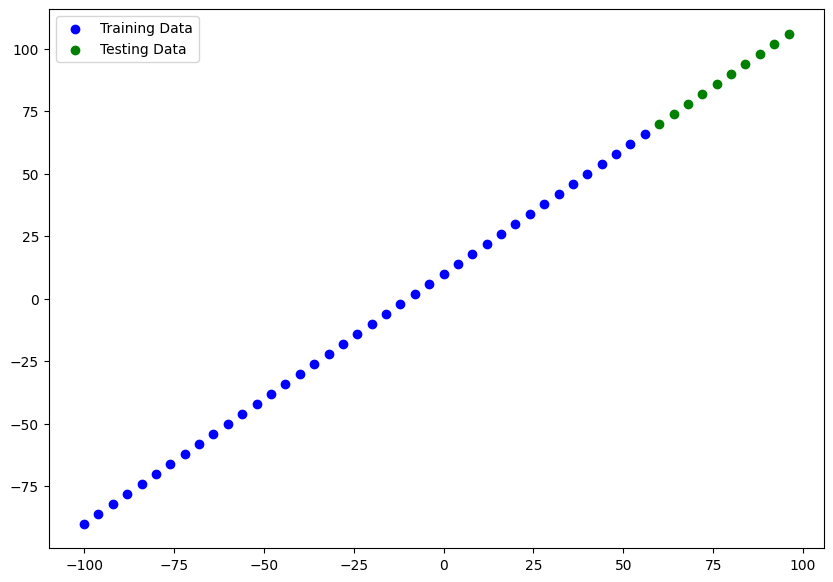

In [ ]:
#Visualize the Data

plt.figure(figsize = (10, 7))
#plot training datain blue
plt.scatter(X_train, y_train, c = "b", label = "Training Data")

#Plot test data in green
plt.scatter(X_test, y_test, c="g", label = "Testing Data")

plt.legend();

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = "mae",
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

#Visualize the model

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
#Lets create a model which builds automatically by defining the input shape argument in the firs layer
tf.random.set_seed(42)

#1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name = "input_layer"),
    tf.keras.layers.Dense(1, name = "output_layer" )
], name = "model_1")


#2. Compile the model
model.compile(
    loss = tf.keras.losses.mae,  
    optimizer = tf.keras.optimizers.SGD(), 
    metrics = ["mae"]
)


In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose = 0)

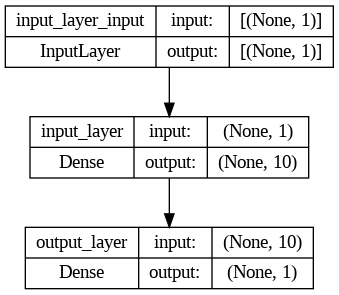

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes = True)

In [ ]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 45ms/step


array([[ 76.68116 ],
       [ 81.67506 ],
       [ 86.66895 ],
       [ 91.662865],
       [ 96.65676 ],
       [101.65066 ],
       [106.644554],
       [111.63845 ],
       [116.63235 ],
       [121.62624 ]], dtype=float32)

In [ ]:
#Calculate the mean absolute erro
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=11.153705>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
#Lets create a plotting function

def plot_predictions(train_data = X_train, 
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  plt.figure(figsize =(10, 7))
  plt.scatter(train_data, train_labels, c = "b" , label = "Training data")
  plt.scatter(test_data, test_labels, c = "g" , label = "Testing data")
  plt.scatter(test_data, predictions, c= "r", label = "Predictions")
  plt.legend();


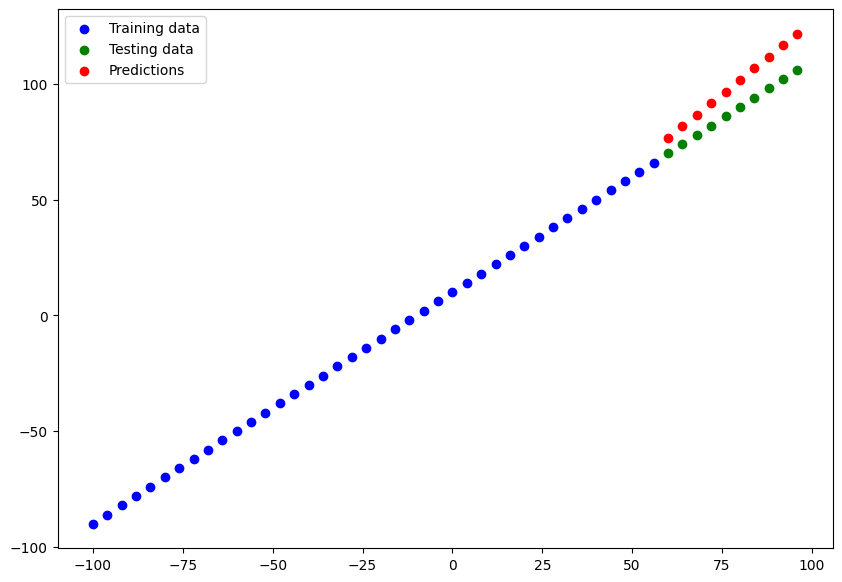

In [ ]:
plot_predictions(train_data = X_train, 
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred)

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 24ms/step - loss: 11.1537 - mae: 11.1537


[11.153704643249512, 11.153704643249512]

In [ ]:
mse = tf.metrics.mean_squared_error(y_true = y_test, y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=132.55476>

## Running Experiments to improve our model

Build Model 1

In [ ]:
#Set seed
tf.random.set_seed(42)

#1. Create the model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_1.compile(loss = tf.keras.losses.mae,
           optimizer = tf.keras.optimizers.SGD(),
           metrics = ["mae"])

#3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 21ms/step - loss: 11.5296 - mae: 11.5296
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 8.3302 - mae: 8.3302
Epoch 3/100
2/2 [==============================] - 0s 12ms/step - loss: 10.4539 - mae: 10.4539
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 12.9310 - mae: 12.9310
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 11.9750 - mae: 11.9750
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.2624 - mae: 9.2624
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.4290 - mae: 8.4290
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0253 - mae: 9.0253
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 18.4113 - mae: 18.4113
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 9.9197 - mae: 9.9197
Epoch 11/100
2/2 [==============================] - 0s 13ms/ste

1/1 [==============================] - 0s 47ms/step


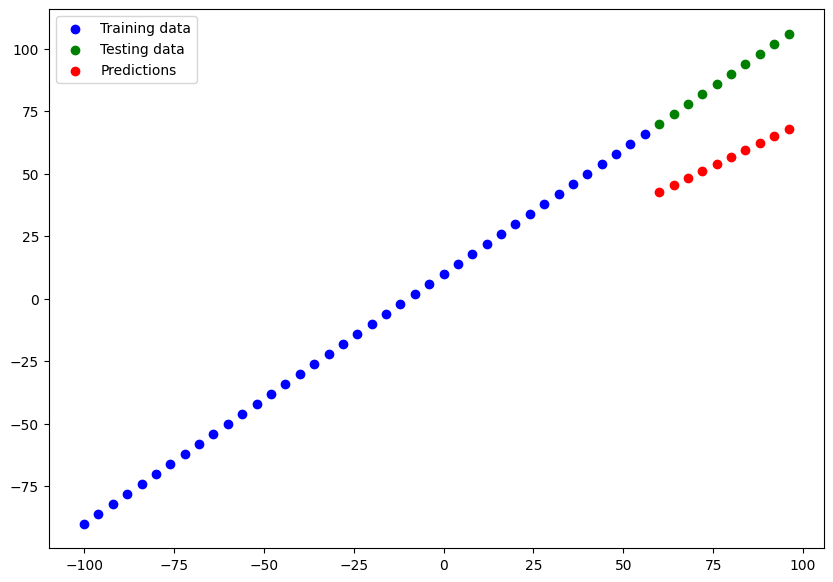

In [ ]:
#make predictions for model_1
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions = y_pred_1)

In [ ]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true, y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true, y_pred = tf.squeeze(y_pred))


In [ ]:
#Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=32.63147>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1077.2566>)

Build Model 2

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mse"])

model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 14ms/step - loss: 51.6515 - mse: 4143.2056
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 28.5021 - mse: 1055.7826
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 33.3051 - mse: 1675.2900
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 28.8735 - mse: 1234.3571
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 15.6458 - mse: 318.3979
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 12.4019 - mse: 196.5234
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.6700 - mse: 167.2757
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 12.0526 - mse: 198.6856
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 37.7178 - mse: 2193.0022
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 25.3514 - mse: 901.8744
Epoch 11/100
2/2 [=========================

1/1 [==============================] - 0s 44ms/step


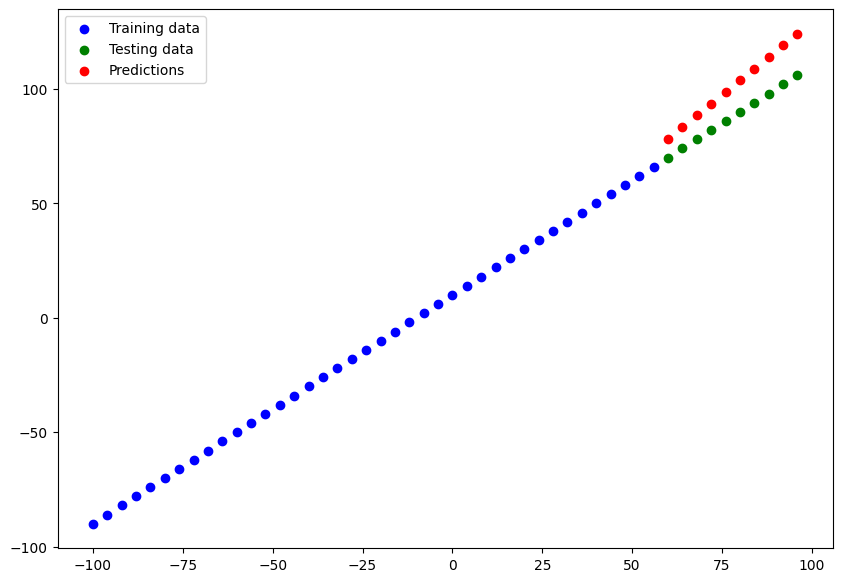

In [ ]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions = y_pred_2)

In [ ]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.172277>,
 <tf.Tensor: shape=(), dtype=float32, numpy=183.44583>)

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mse"])

model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 0s 12ms/step - loss: 25.8372 - mse: 1114.5823
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 24.3977 - mse: 798.9761
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 28.6050 - mse: 1238.9124
Epoch 4/500
2/2 [==============================] - 0s 7ms/step - loss: 13.8494 - mse: 256.6994
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 18.8379 - mse: 481.7922
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 9.4517 - mse: 123.1520
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 10.4273 - mse: 139.9696
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 12.0676 - mse: 199.6152
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 37.7931 - mse: 2202.9360
Epoch 10/500
2/2 [==============================] - 0s 6ms/step - loss: 25.4145 - mse: 906.5156
Epoch 11/500
2/2 [============================

1/1 [==============================] - 0s 178ms/step


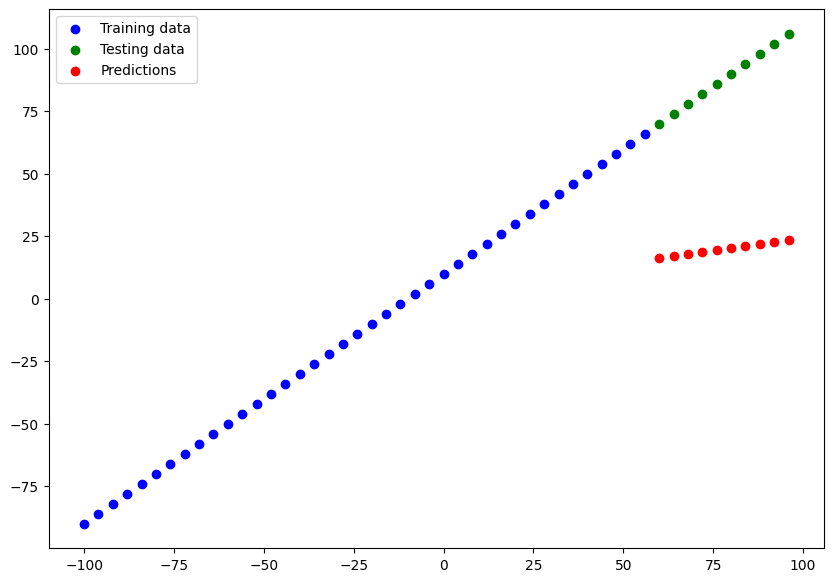

In [ ]:
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions = y_pred_3)

In [ ]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.070755>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4718.399>)

Comparing the results of our experiments

In [ ]:
#Lets compare our models using pandas dataframe
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
results

,model,mae,mse
0,model_1,32.631470,1077.256592
1,model_2,13.172277,183.445831
2,model_3,68.070755,4718.398926


## Saving our models
There are 2 main formats we can save our models:

1.   The SavedModel format
2.   The HDF5 format


In [ ]:
#Save model in SavedModel Format
model_2.save("best_model_SavedModel_format")

In [ ]:
#save model using the hdf5 format
model_2.save("best_model_HDF5_format.h5")

In [ ]:
#load in SavedModel format(
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                20        
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#compare model_2 predictions with the SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

1/1 [==============================] - 0s 65ms/step


In [ ]:
model_2_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
mae(y_true = y_test, y_pred = model_2_preds) == mae(y_true = y_test, y_pred = loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

#Download a model (or any other file) from google colab

In [ ]:
#Download a file from google colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Save a file from google colab to google drive (requires mounting google drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/TensorFlow_Course


In [ ]:
!ls /content/drive/MyDrive/TensorFlow_Course

best_model_HDF5_format.h5


## A Larger example

In [1]:
import tensorflow as tf 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [4]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
#One hot encoding categorical variables
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [8]:
#create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [9]:
#View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [10]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [14]:
len(y_train), len(y_test)

(1070, 268)

In [21]:
#Build a neural network
tf.random.set_seed(42)

#1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2.Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

#3. Fit the model 
insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8725.9883 - mae: 8725.9883
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7864.6362 - mae: 7864.6362
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7609.8086 - mae: 7609.8086
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7733.8506 - mae: 7733.8506
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7703.6162 - mae: 7703.6162
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 7566.1392 - mae: 7566.1392
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7568.5684 - mae: 7568.5684
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7828.6445 - mae: 7828.6445
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7450.1973 - mae: 7450.1973
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7675.4658 - mae: 7675.4658

In [22]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7021.9570 - mae: 7021.9570


[7021.95703125, 7021.95703125]

In [23]:
#try creating a better model
tf.random.set_seed(42)

#1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2.Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

#3. Fit the model 
insurance_model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 2s 3ms/step - loss: 13295.8203 - mae: 13295.8203
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13119.5059 - mae: 13119.5059
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12750.2256 - mae: 12750.2256
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 12014.3105 - mae: 12014.3105
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 10802.4141 - mae: 10802.4141
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9330.6416 - mae: 9330.6416
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 8071.1709 - mae: 8071.1709
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7548.0928 - mae: 7548.0928
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7470.6069 - mae: 7470.6069
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7449.9546 - mae:

In [24]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4606.7002 - mae: 4606.7002


[4606.7001953125, 4606.7001953125]

## Model 3 

In [27]:
#try creating a better model
tf.random.set_seed(42)

#1. Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2.Compile the model
insurance_model_3.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

#3. Fit the model 
history = insurance_model_3.fit(X_train, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13301.8906 - mae: 13301.8906
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13150.0703 - mae: 13150.0703
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12826.2236 - mae: 12826.2236
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12182.3242 - mae: 12182.3242
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 11086.7852 - mae: 11086.7852
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9651.6201 - mae: 9651.6201
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 8296.2363 - mae: 8296.2363
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7586.0449 - mae: 7586.0449
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7452.8638 - mae: 7452.8638
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7431.0977 - mae:

In [28]:
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3496.9028 - mae: 3496.9028


[3496.90283203125, 3496.90283203125]

### Plot history (Also known as loss curve or training curve)

Text(0.5, 0, 'epochs')

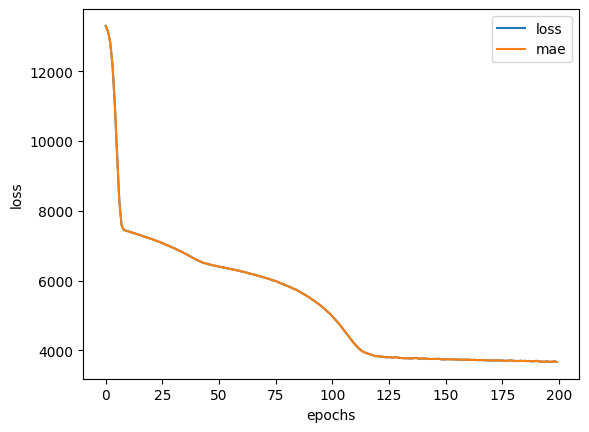

In [29]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (Standardization and Normalization)

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [31]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [34]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#Create a column transformer 
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
)

#Create X and Y
X = insurance.drop("charges", axis = 1)
Y = insurance["charges"]

#Build our train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

#fit the column transformer to our training data 
ct.fit(X_train)

#transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [35]:
#try creating a better model
tf.random.set_seed(42)

#1. Create a model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2.Compile the model
insurance_model_4.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics = ["mae"])

#3. Fit the model 
history = insurance_model_4.fit(X_train_normal, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 2s 8ms/step - loss: 13343.0381 - mae: 13343.0381
Epoch 2/200
34/34 [==============================] - 0s 6ms/step - loss: 13332.6660 - mae: 13332.6660
Epoch 3/200
34/34 [==============================] - 0s 7ms/step - loss: 13306.6562 - mae: 13306.6562
Epoch 4/200
34/34 [==============================] - 0s 7ms/step - loss: 13253.8291 - mae: 13253.8291
Epoch 5/200
34/34 [==============================] - 0s 6ms/step - loss: 13163.4980 - mae: 13163.4980
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 13025.0938 - mae: 13025.0938
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 12828.6699 - mae: 12828.6699
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 12564.3096 - mae: 12564.3096
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 12222.0352 - mae: 12222.0352
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 11801.73

In [36]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3166.8508 - mae: 3166.8508


[3166.850830078125, 3166.850830078125]